In [1]:
import numpy as np
from Py6S import *
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
import drjit as dr
import mitsuba as mi

mi.set_variant('llvm_ad_rgb_double')

In [2]:
solar_zenith = 45
wind_speed = 25
wavelength = 0.55

sixs_path = f'brdf/data/6S_brdf_{solar_zenith}_{wind_speed}_{wavelength}.npy'
mitsuba_path = f'brdf/data/mitsuba_brdf_{solar_zenith}_{wind_speed}_{wavelength}.npy'

In [3]:
# Load data
sixs_brdf = np.load(sixs_path)
mitsuba_brdf = np.load(mitsuba_path)

# Extract the last dimension from the sixs_brdf
sixs_brdf = sixs_brdf[..., -1]

# Relative Diff

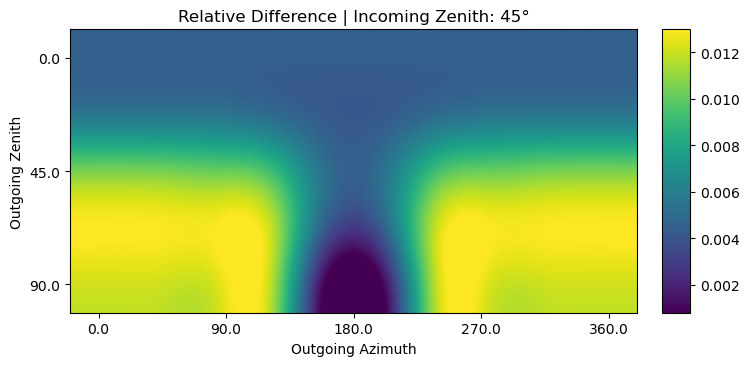

In [4]:
# Compute the relative difference between the two images
#diff = np.abs(loaded_6s - loaded_brdf)
diff = np.abs(sixs_brdf - mitsuba_brdf) / mitsuba_brdf

# Plot the relative difference as Viridis colormap
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the difference
im = ax.imshow(diff, interpolation='spline36', cmap='viridis')

# Name the axes
plt.xlabel("Outgoing Azimuth")
plt.ylabel("Outgoing Zenith")

# Add the title
degrees = np.degrees(solar_zenith)
degrees = round(degrees, 2)

# Set tick labels for the axis
num_x_ticks = 5
x_labels = np.linspace(0, 2 * np.pi, num_x_ticks)
x_labels = np.degrees(x_labels)
x_labels = [round(label, 2) for label in x_labels]
plt.xticks(np.linspace(0, len(sixs_brdf[1]) - 1, num_x_ticks), x_labels)

num_y_ticks = 3
y_labels = np.linspace(0, np.pi / 2, num_y_ticks)
y_labels = np.degrees(y_labels)
y_labels = [round(label, 2) for label in y_labels]
plt.yticks(np.linspace(0, len(sixs_brdf) - 1, num_y_ticks), y_labels)

# Add Title
ax.set_title(f'Relative Difference | Incoming Zenith: {solar_zenith}°')

# Add color bar with same height as the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)
plt.colorbar(im, cax=cax)
plt.show()

# Centered

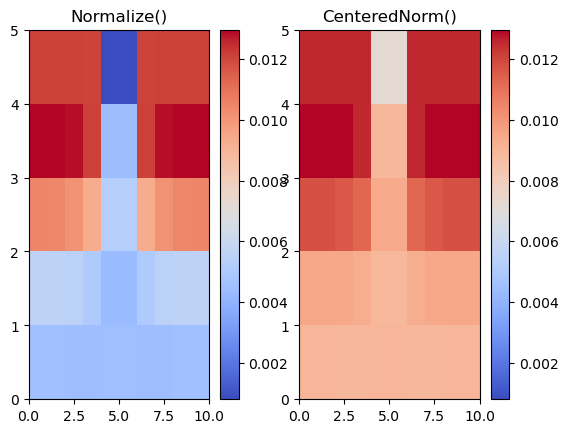

In [5]:
cmap = plt.get_cmap('coolwarm')
fig, (ax1, ax2) = plt.subplots(ncols=2)
pc = ax1.pcolormesh(diff, cmap=cmap)
fig.colorbar(pc, ax=ax1)
ax1.set_title('Normalize()')

ax2.pcolormesh(diff, norm=colors.CenteredNorm(), cmap=cmap)
fig.colorbar(pc, ax=ax2)
ax2.set_title('CenteredNorm()')
plt.show()